In [1]:
    from poser import method
    import shapely
    from shapely.geometry import *
    from shapely.affinity import *

In [2]:
    BaseGeo, Number = shapely.geometry.base.BaseGeometry, __import__('numbers').Number

In [3]:
    @method
    class __:
        def __pow__(a: BaseGeo, b: Number):
            return rotate(a, b)
        def __add__(a: BaseGeo, b: BaseGeo):
            return BaseGeo.union(a, b)
        def __mul__(a: BaseGeo, b: Number):
            return scale(a, b, b)
        def __rshift__(a: BaseGeo, b: BaseGeo):
            return MultiPolygon([b, a])
        def __lshift__(a: BaseGeo, b: BaseGeo):
            return MultiPolygon([a,b])
        def __abs__(a: BaseGeo):
            return  translate(a, -a.centroid.x, -a.centroid.y)
    @method
    def __mul__(a: BaseGeo, b: list):
        b = b + [0]*(6-len(b))
        return affine_transform(a, b)
        
    @method
    def __add__(a: BaseGeo, b: tuple):
        return translate(a, *b)
    
    @method
    def __sub__(a: BaseGeo, b: tuple): 
        return translate(a, *map((-1).__mul__, b))
    @method
    def __round__(a: BaseGeo): return  a.buffer(1)
    
    @method
    def __round__(a: BaseGeo, b: Number): return  a.buffer(b)


In [4]:
    p = Polygon([(0,0), (0,1), (1,0)])

In [5]:
    s = abs(p + p**180)

In [6]:
    def deform(i:(-1.1, 1.1)=.1): return s * [1,i,i,1] >> s

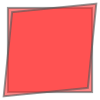

In [7]:
    # NBVAL_IGNORE_OUTPUT
    deform()

In [8]:
    def rot(i:(-3, 3)=.1): return s * [1,-i,i,1] >> s

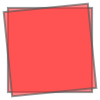

In [9]:
    # NBVAL_IGNORE_OUTPUT
    rot()

In [10]:
    import scipy.spatial, numpy    
    triangles = scipy.spatial.Delaunay(numpy.random.randn(100, 2))

In [11]:
    delaunay = MultiPolygon([Polygon(triangles.points[list(x),:]) for x in triangles.vertices])
    delaunay = MultiPolygon([Polygon(triangles.points[list(x),:]) for x in triangles.vertices])

In [12]:
    voronoi = scipy.spatial.Voronoi(triangles.points)
    voronoi = MultiPolygon([Polygon(voronoi.vertices[x,:]) for x in voronoi.regions if len(x) > 3])

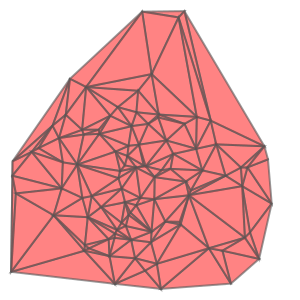

In [13]:
    # NBVAL_IGNORE_OUTPUT
    (delaunay * 10000)**50